In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('MallCustomers.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We Dont have miising values!!

In [3]:
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

We have again proved that there is no Missing data!!

In [4]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


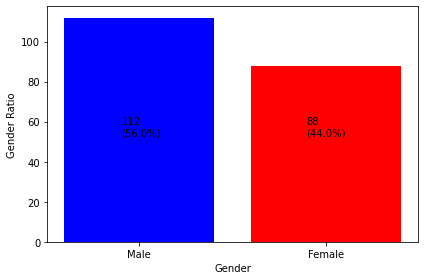

In [7]:
plt.bar(['Male','Female'], df['Gender'].value_counts(), color=['b','r'])
plt.xlabel('Gender')
plt.ylabel('Gender Ratio')
plt.annotate('{}\n({:.4}%)'.format(df['Gender'].value_counts()['Female'], 
                                         df['Gender'].value_counts()['Female']/df['Gender'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Gender'].value_counts()['Male'], 
                                         df['Gender'].value_counts()['Male']/df['Gender'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

#  Descriptive statistical analysis for features

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In order to make further calculations it is better to convert catigorical values into nominal numbers. But we should know it is only nominal values that will not make any influence of meaning. 1 Male does not make difference than 0 Female, it can be reversed.

# Clustering

In this part we are segmenting the custumers by age,Income and Spending.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# We dont need Customer Id because it is does not have significant values.
df.drop(["CustomerID"], axis = 1, inplace=True)


In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


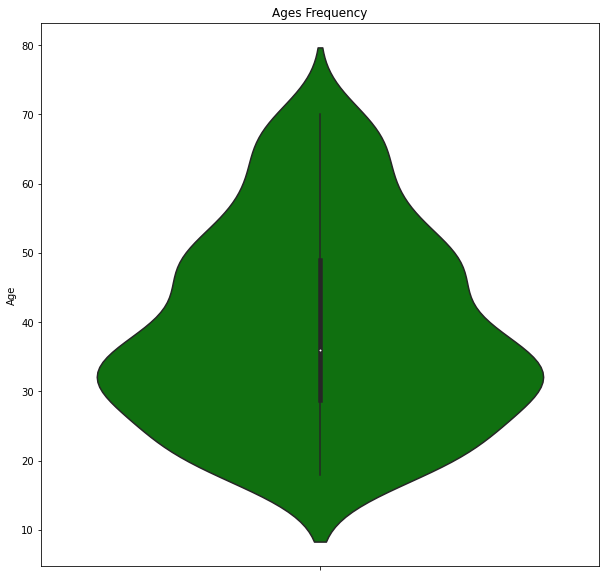

In [21]:
# Let's see age distributions of customers 
plt.figure(figsize=(10,10))
plt.title("Ages Frequency")
sns.violinplot(y=df["Age"],color='green')
plt.show()

From above violinplor we can observe that most of our customers age between 20-40. Mode is around 33.

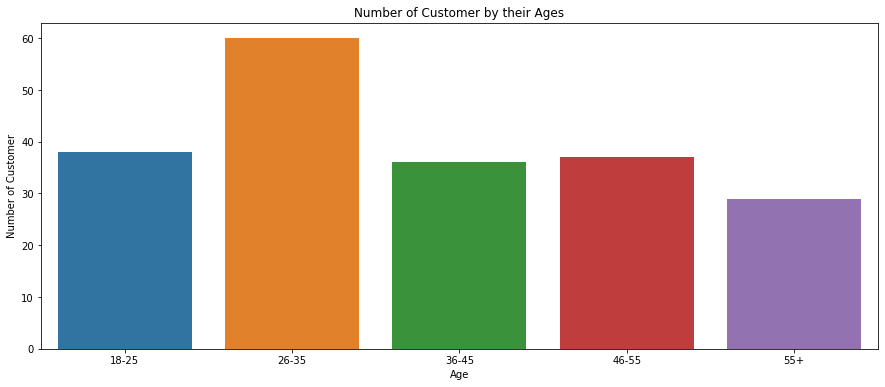

In [24]:
# If we want to know more detailed information about age, we can divide into several age ranges.
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y)
plt.title("Number of Customer by their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Here we can observe that 26-35 are range is the most common custumers, our marketin department should target them in social media campaigns.

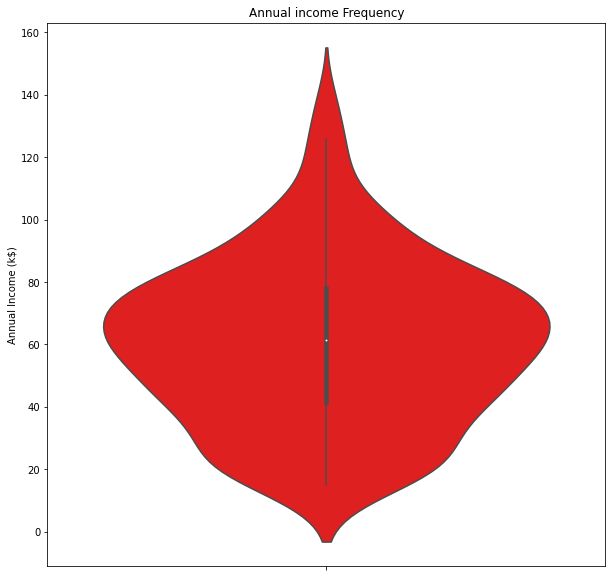

In [27]:
# Let's see Annual income distributions of customers 
plt.figure(figsize=(10,10))
plt.title("Annual income Frequency")
sns.violinplot(y=df["Annual Income (k$)"],color='Red')
plt.show()

From above violinplor we can observe that most of our customers anuall income between 40-80k$. Mode is around 67K$. 

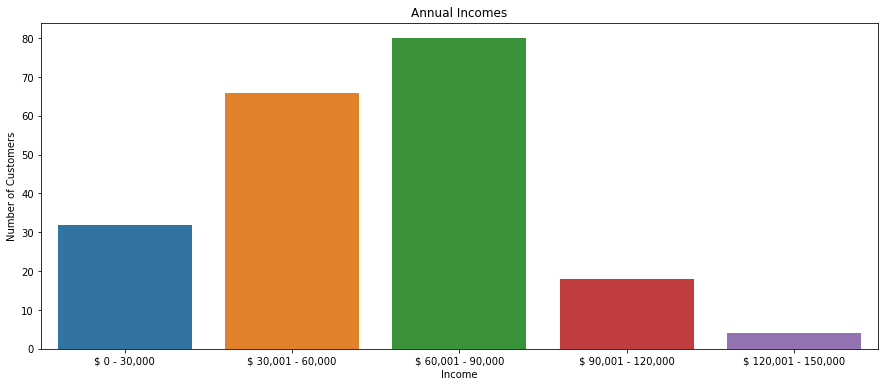

In [28]:
# Let's see Annual income distributions more detailed by customers 
in0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
in31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
in61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
in91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
in121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

inx = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
iny = [len(in0_30.values), len(in31_60.values), len(in61_90.values), len(in91_120.values), len(in121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=inx, y=iny)
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

Here we can observe that the most common custumers annual income from $60-90K,means we should target on middle + class clients. Our marketing department should target them in social media campaigns.

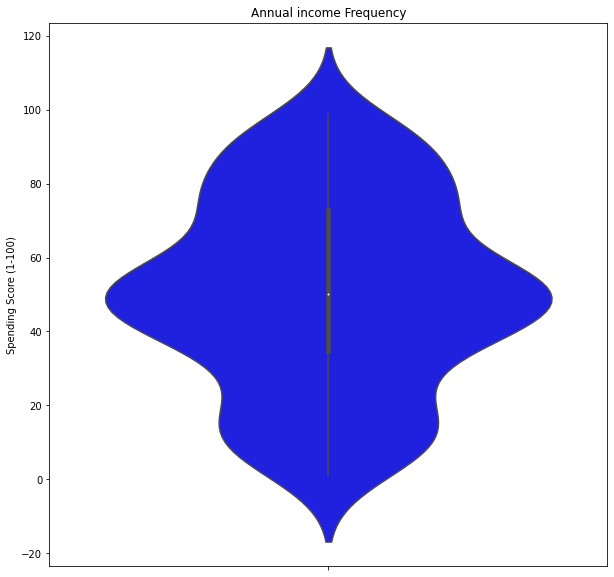

In [23]:
# Let's see Spending Score (1-100) distributions of customers 
plt.figure(figsize=(10,10))
plt.title("Annual income Frequency")
sns.violinplot(y=df["Spending Score (1-100)"],color='blue')
plt.show()

From above violinplor we can observe that most of our customers Spending Score between 40-60. Mode is around 50.

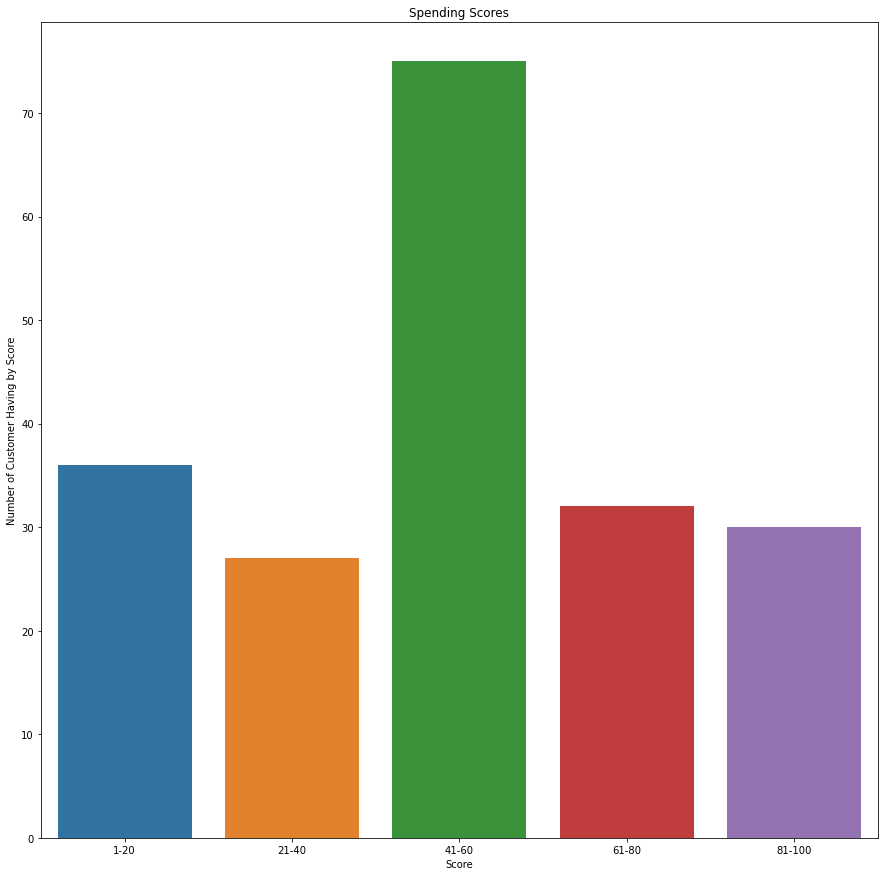

In [26]:
# Let's see Spending Score (1-100) distributions more detailed by customers
score1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
score21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
score41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
score61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
score81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

scorex = ["1-20", "21-40", "41-60", "61-80", "81-100"]
scorey = [len(score1_20.values), len(score21_40.values), len(score41_60.values), len(score61_80.values), len(score81_100.values)]

plt.figure(figsize=(15,15))
sns.barplot(x=scorex, y=scorey)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having by Score")
plt.show()

Here we can observe that the most common custumers spending score from 40-60,means we should target on middle class products. our marketing department should target them in social media campaigns.

Now we will start clustering. 
But firstly we should identify the optimal number of clusters for customers.
For that we are using Within Cluster Sum Of Squares (WCSS),which measures sum of distances of observations from their cluster centroids.The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

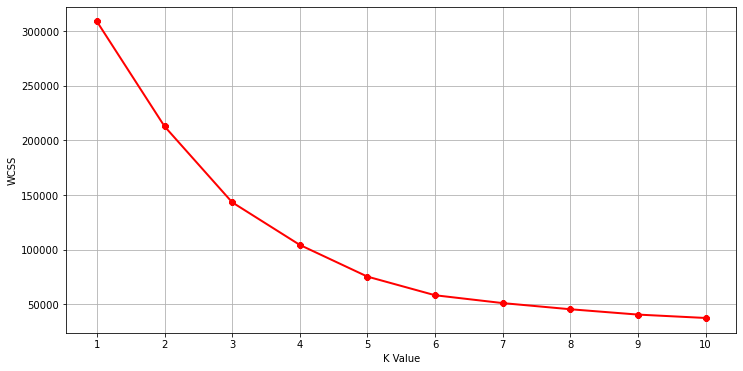

In [29]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Here optimal number of clusters is 5, because after 5 WCSS is not decreasing much.

Now we can divide into clusters by plotting, as we have 3 different components which will influence to costumers preference we will plot 3 dimentional graph.

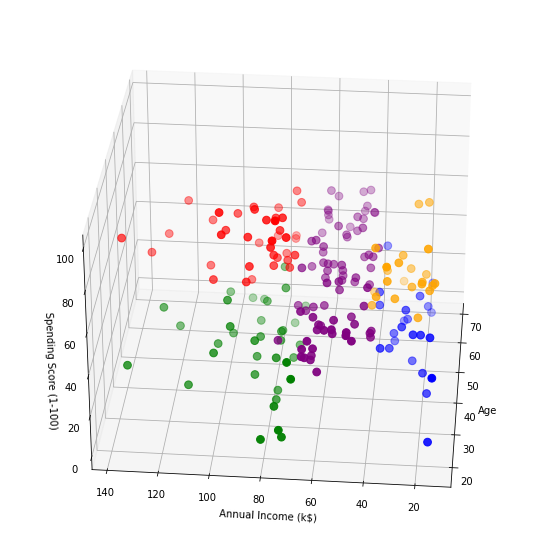

In [30]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=5)
clusters = KMeans(n_clusters=5).fit_predict(df.iloc[:,1:])
df["label"] = clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [31]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


Label column shows in which cluster our client belongs.